# Generate map of deep south

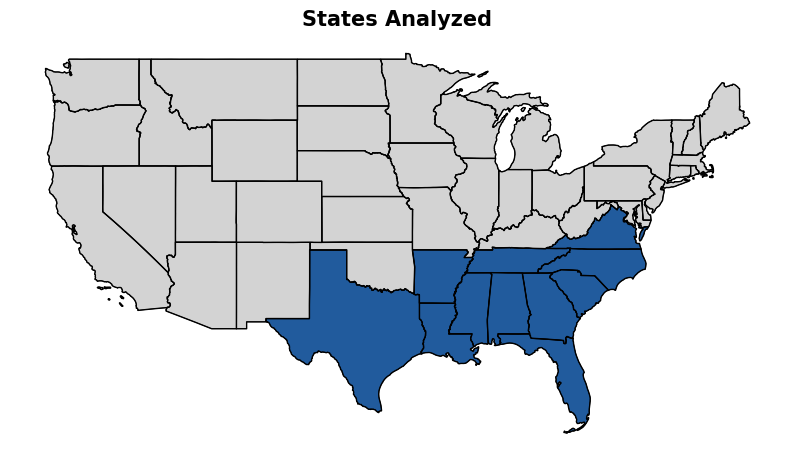

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the map of the US with a different method to avoid issues
usa = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip")
usa = usa[(usa.STUSPS != "AK") & (usa.STUSPS != "HI") & (usa.STUSPS != "PR")]  # Exclude Alaska and Hawaii

# List of states to highlight
highlight_states = ["AL", "AR", "FL", "GA", "LA", "MS", "NC", "SC", "TN", "TX", "VA"]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
usa['highlight'] = usa['STUSPS'].apply(lambda x: '#215B9D' if x in highlight_states else 'lightgray')
usa.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')  # Thin borders
usa.plot(ax=ax, color=usa['highlight'], edgecolor='black')

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('States Analyzed', fontsize=15)

# Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # Add the list of highlighted states in the bottom right corner
# highlight_states_names = [
#     "Alabama", "Arkansas", "Florida", "Georgia", "Louisiana", "Mississippi", 
#     "North Carolina", "South Carolina", "Tennessee", "Texas", "Virginia"
# ]
# textstr = "\n".join(highlight_states_names)
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax.text(1.05, 0.05, textstr, transform=ax.transAxes, fontsize=10,
#         verticalalignment='bottom', bbox=props)

# Save the figure
plt.savefig('../figures/highlighted_states.png', dpi=300, bbox_inches='tight')
plt.show()